In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cluster_mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
df['origin'].value_counts()

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

In [7]:
df_w_dummies = pd.get_dummies(df.drop('name',axis=1))

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaled_data = scaler.fit_transform(df_w_dummies)

In [13]:
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [17]:
scaled_df = pd.DataFrame(scaled_data, columns=df_w_dummies.columns)

<Axes: >

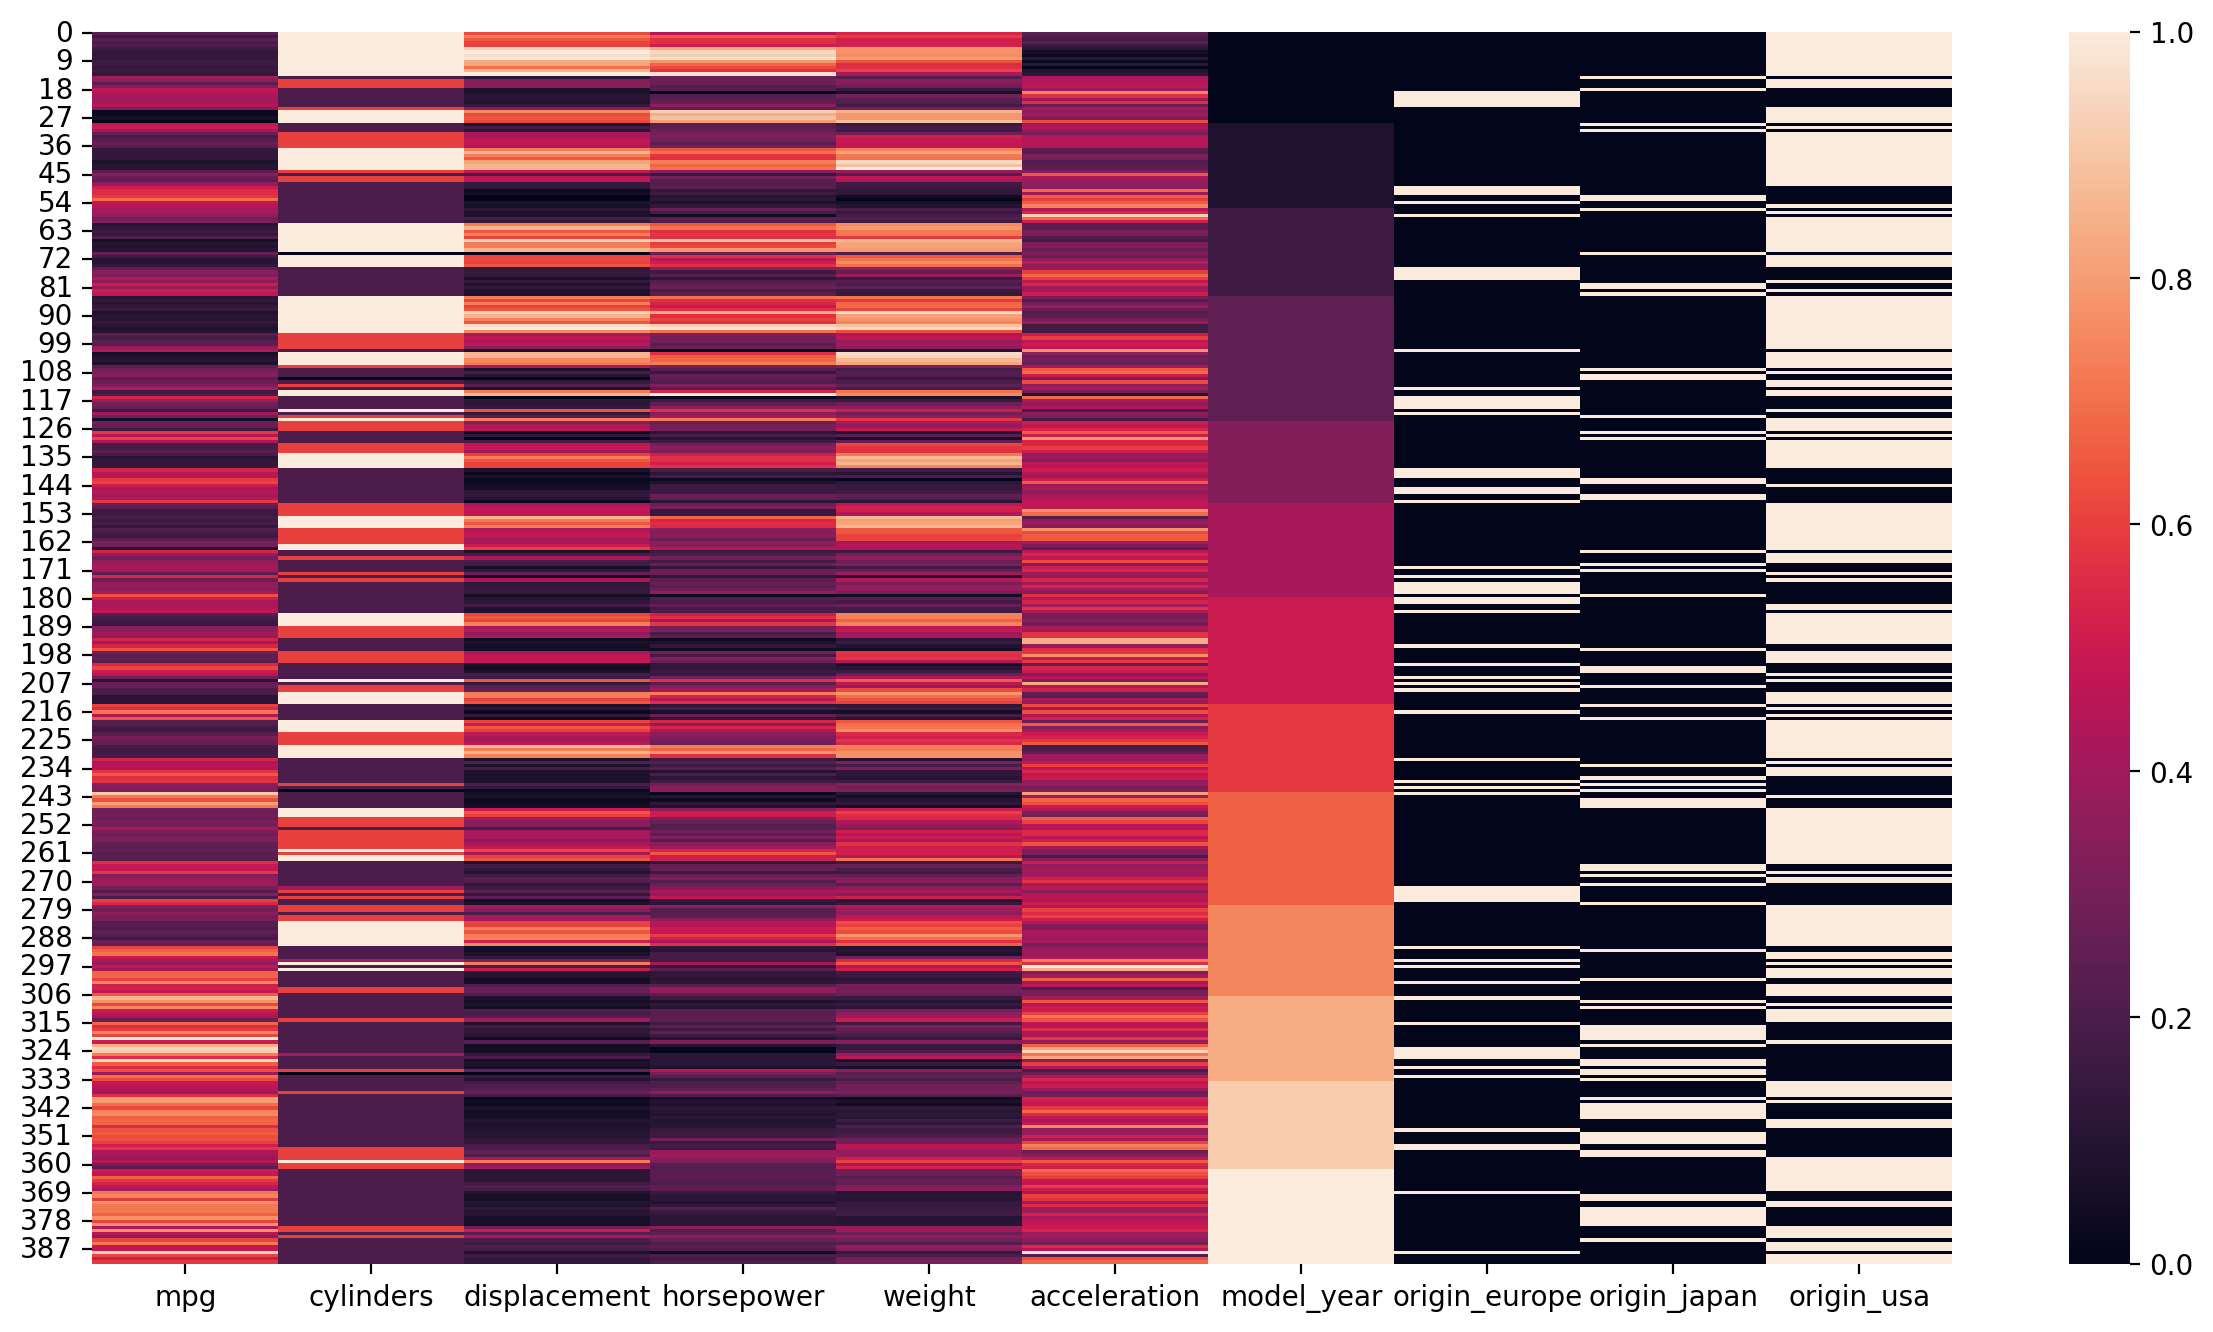

In [18]:
plt.figure(figsize=(15,8),dpi=200)
sns.heatmap(scaled_df)

<Figure size 3000x1600 with 0 Axes>

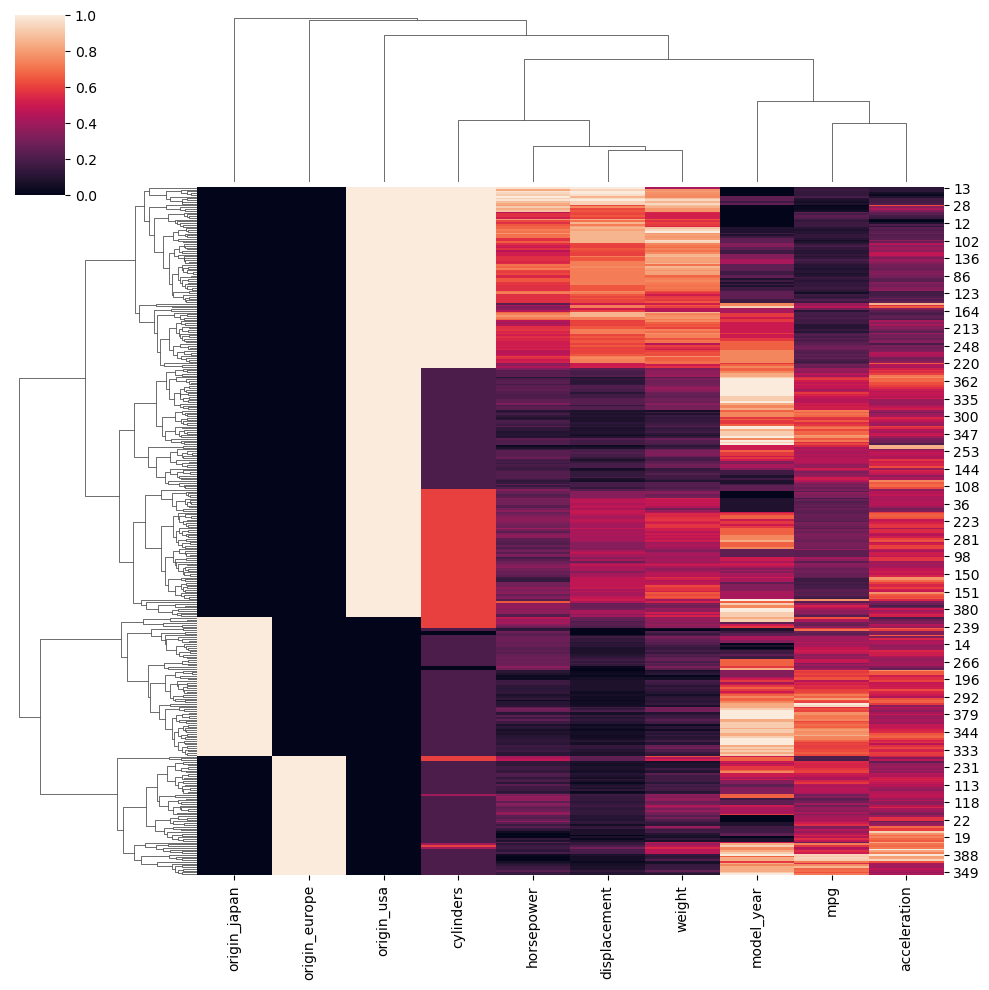

In [23]:
# cluster similar cars to each other
plt.figure(figsize=(15,8),dpi=200)
sns.clustermap(scaled_df);

In [24]:
len(df)

392

## Part Two: Clusters and Dendrograms

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
model = AgglomerativeClustering(n_clusters=4)

In [27]:
cluster_labels = model.fit_predict(scaled_df)

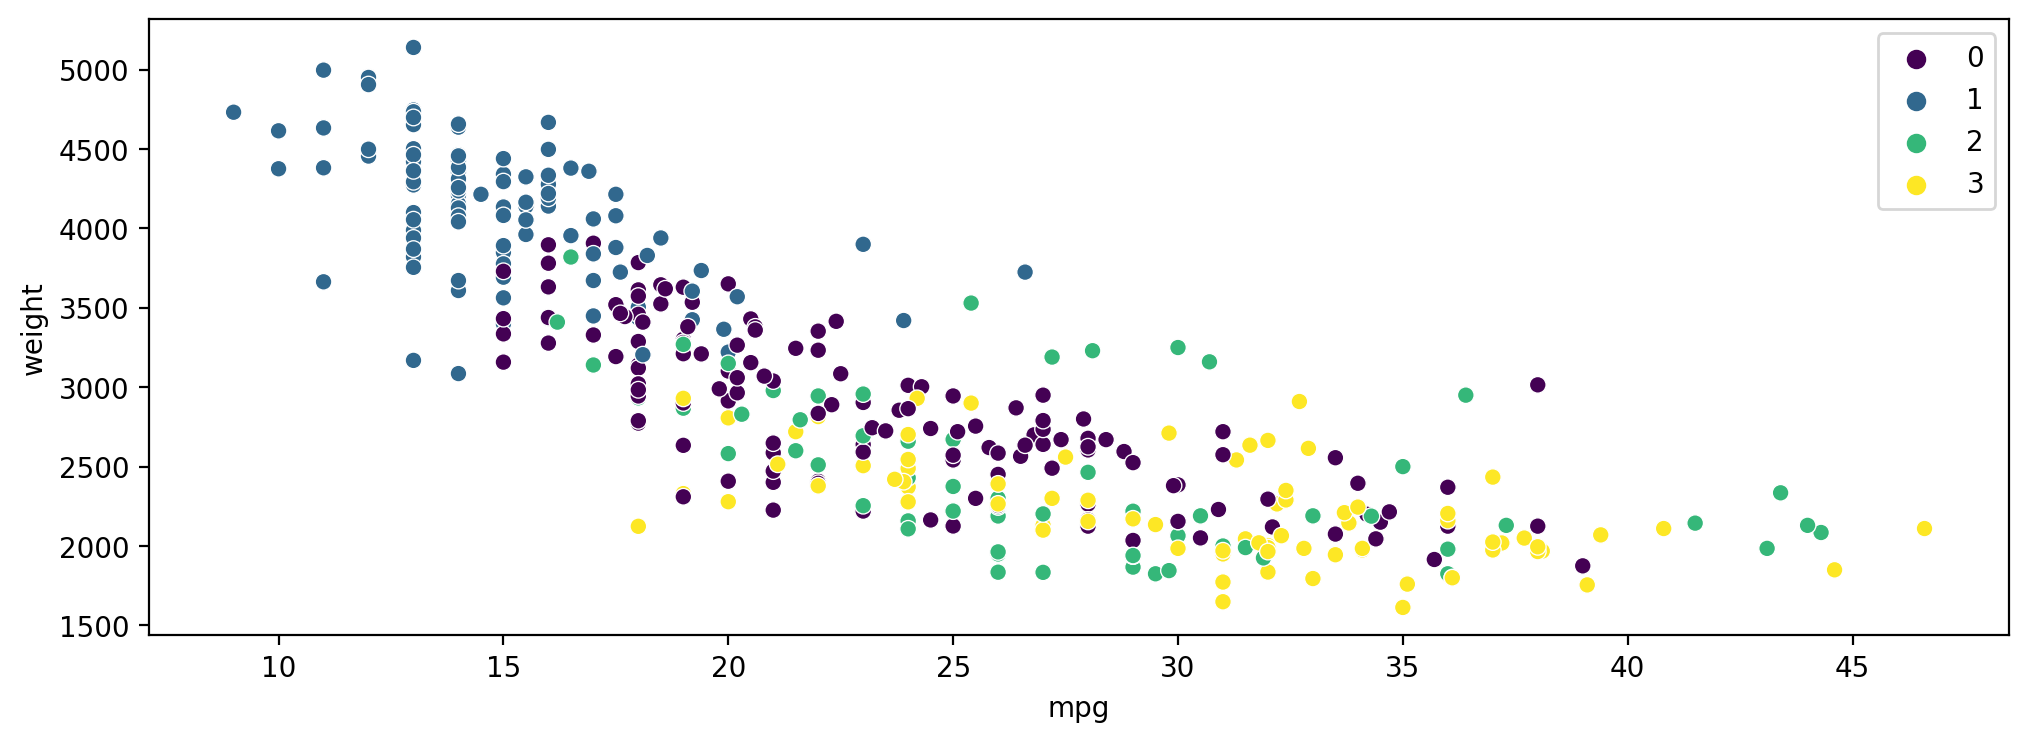

In [29]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df, x='mpg', y='weight',hue=cluster_labels, palette='viridis');

In [ ]:
# max distance possible?
# sqrt (N_features)

In [30]:
len(scaled_df.columns)

10

In [31]:
np.sqrt(10) # MAX DISTANCE POSSIBLE BETWEEN TWO POINTS (MIN/MAX SCALING)

3.1622776601683795

## Exploring Number of Clusters with Dendrograms

Make sure to read the documentation online!
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

#### Assuming every point starts as its own cluster

In [32]:
# similar to K-MEANS = N_feature ( every single point have it's own cluster)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

In [33]:
cluster_labels = model.fit_predict(scaled_df)

In [34]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

### Linkage Matrix

Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

    A (n-1) by 4 matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index less than n corresponds to one of the original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

In [35]:
linkage_matrix = hierarchy.linkage(model.children_)

In [36]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

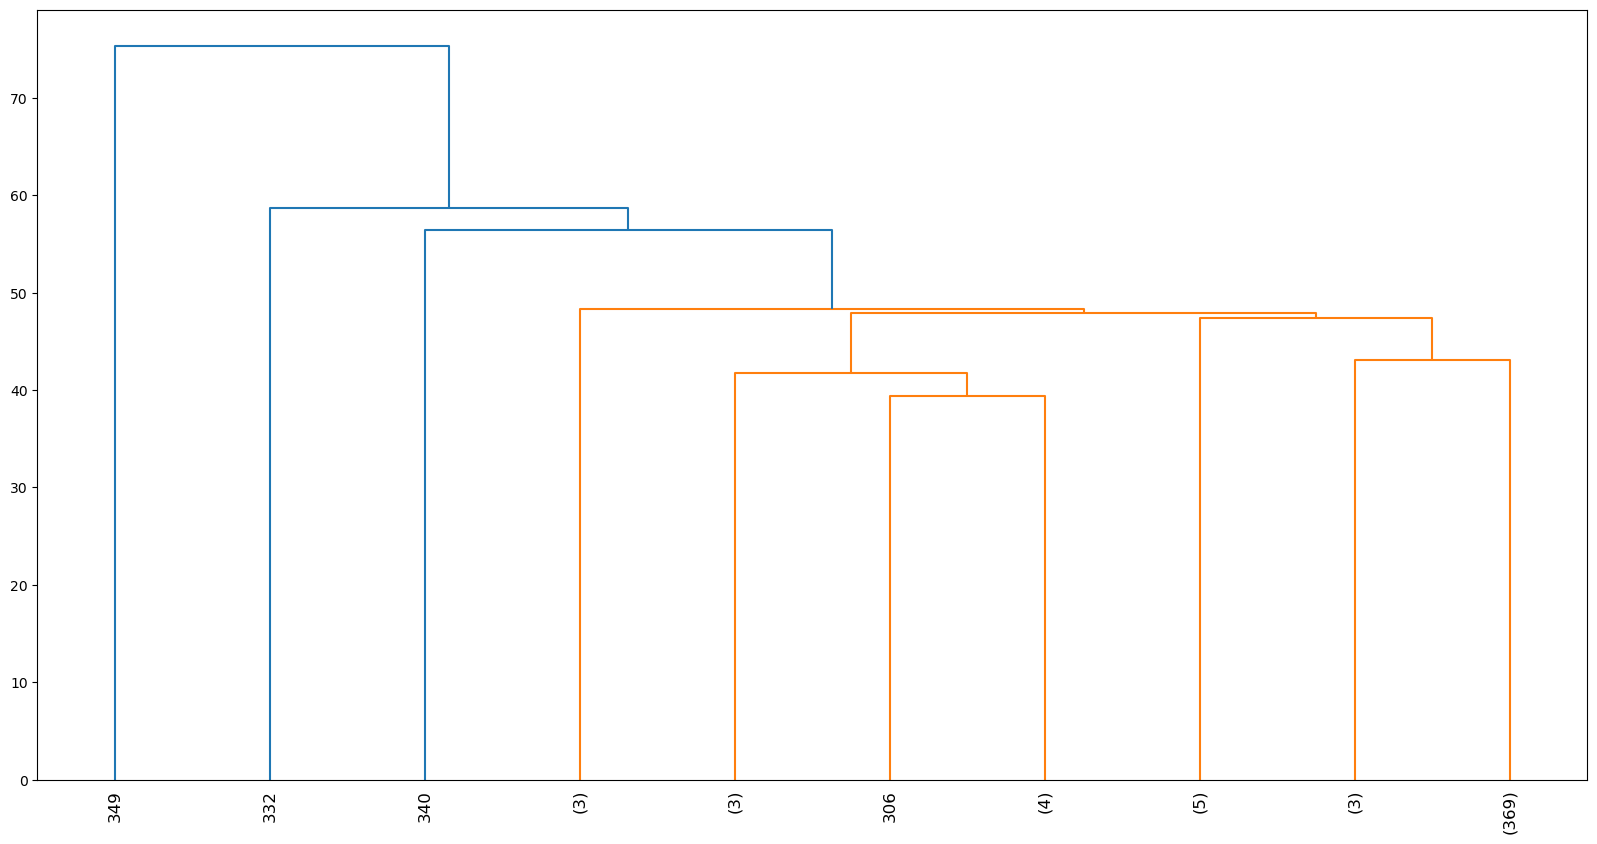

In [42]:
plt.figure(figsize=(20,10))
dendro = hierarchy.dendrogram(linkage_matrix, truncate_mode='lastp',p=10)
plt.xticks(rotation=90);

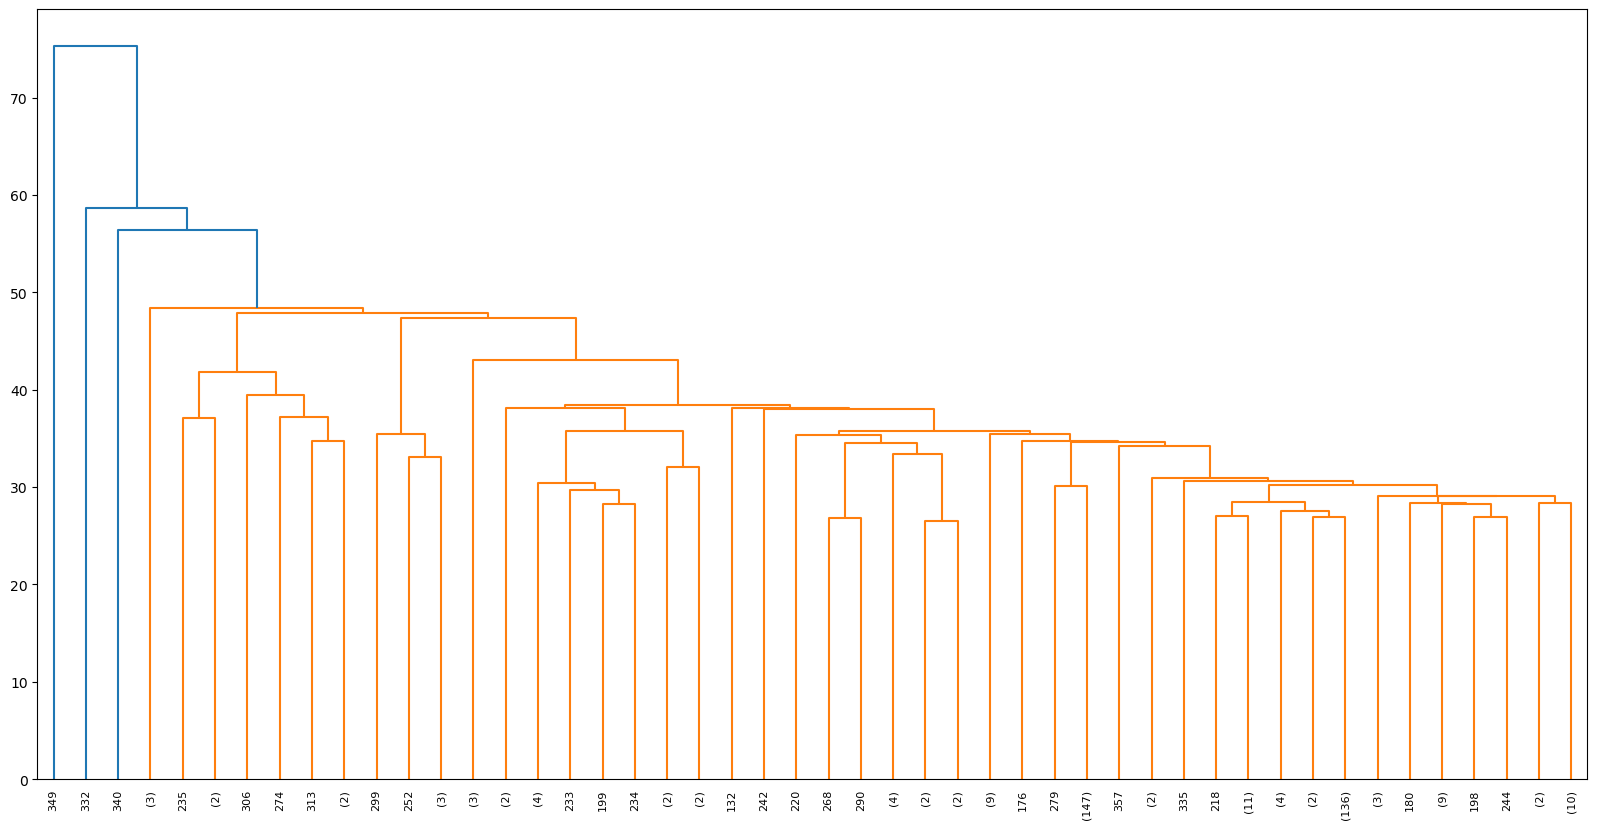

In [55]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=48)

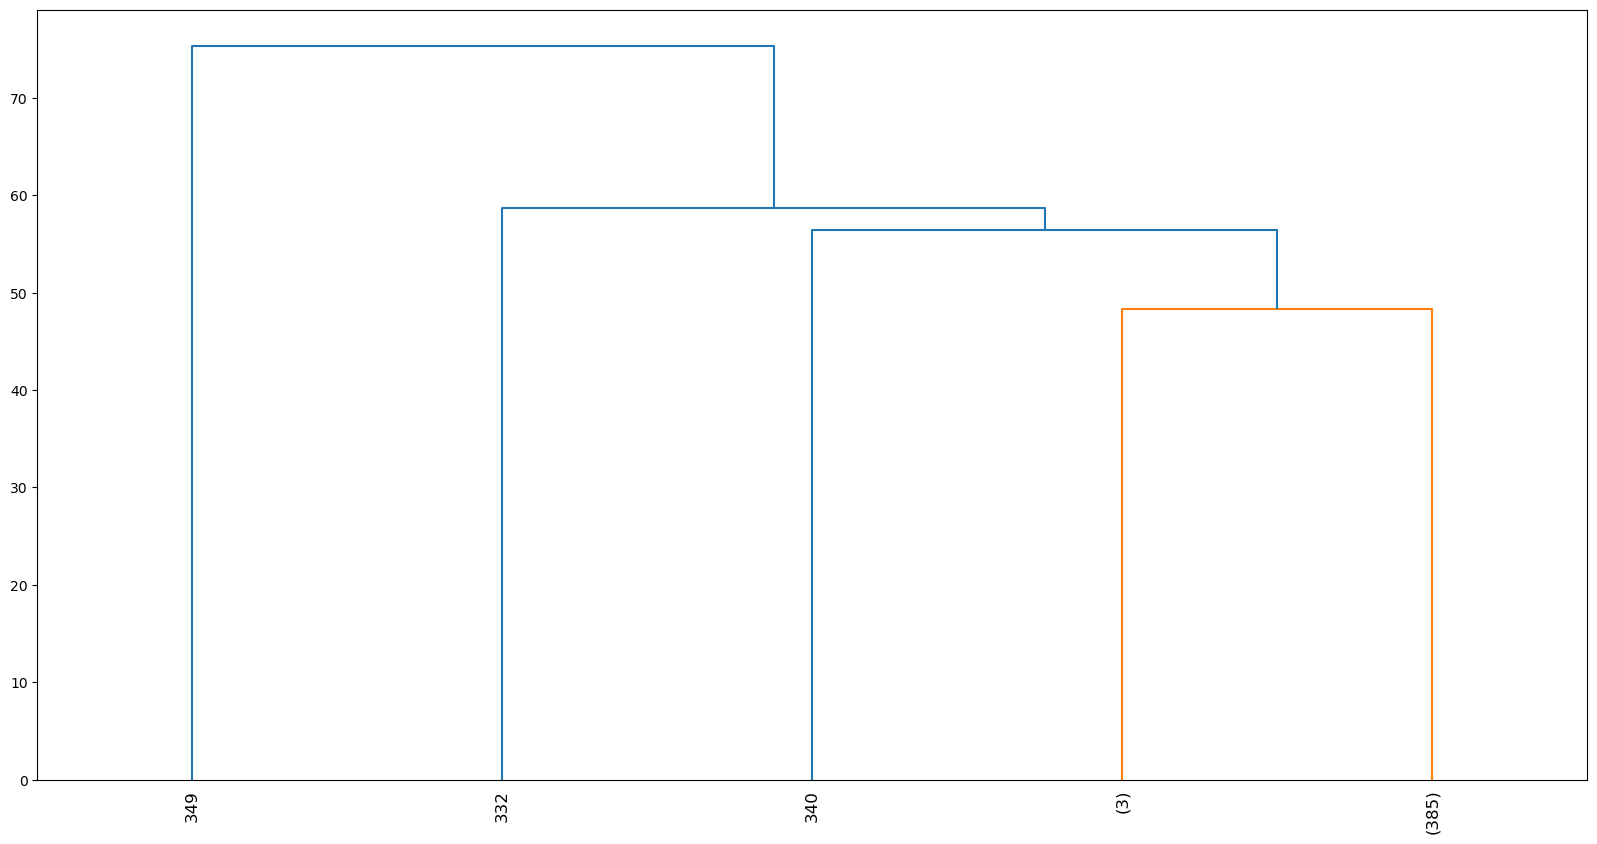

In [43]:
plt.figure(figsize=(20,10))
dendro = hierarchy.dendrogram(linkage_matrix, truncate_mode='level',p=3)
plt.xticks(rotation=90);

### Choosing a Threshold Distance

**What is the distance between two points?**

In [44]:
scaled_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.384200,0.494388,0.326646,0.317768,0.386897,0.448888,0.498299,0.173469,0.201531,0.625000
std,0.207580,0.341157,0.270398,0.209191,0.240829,0.164218,0.306978,0.379136,0.401656,0.484742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.212766,0.200000,0.095607,0.157609,0.173589,0.343750,0.250000,0.000000,0.000000,0.000000
50%,0.365691,0.200000,0.214470,0.258152,0.337539,0.446429,0.500000,0.000000,0.000000,1.000000
75%,0.531915,1.000000,0.536822,0.434783,0.567550,0.537202,0.750000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
# MAX Possible Distance
np.sqrt(len(scaled_df.columns))

3.1622776601683795

In [46]:
scaled_df['mpg'].max()

1.0000000000000002

In [47]:
scaled_df['mpg'].idxmax()

320

In [48]:
scaled_df['mpg'].idxmin()

28

In [53]:
distance = np.linalg.norm(car_a-car_b)

In [51]:
car_a = scaled_df.iloc[320]
car_b = scaled_df.iloc[28]

In [54]:
distance # realistic Max distance 

2.3852929970374714